# 1. Fundamentos de *Machine Learning*

En este notebook se revisarán los conceptos de:

1. Notación
2. Vecinos más próximos
3. Repaso de Pandas
4. Evaluación del modelo: entrenamiento y test
5. Selección del modelo: validación cruzada
6. Conceptos fundamentales de ML
  1. Compromiso sesgo-varianza
  2. Curvas de aprendizaje

Primero cargamos librerías y funciones necesarias, incluyendo las del módulo `utils`:

In [1]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Notación

Vamos a importar la librería principal de este módulo, scikit-learn. Habitualmente se importa como `sklearn`.

In [2]:
import sklearn
sklearn.__version__

'1.5.2'

In [3]:
df = pd.read_csv("./data/automobile.csv")

In [4]:
df.shape

(201, 26)

In [5]:
# show the first 5 rows using dataframe.head() method
print("Las primeras 5 filas del dataframe") 
df.head(5)

Las primeras 5 filas del dataframe


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [6]:
index = df.index
columns = df.columns
values = df.values

print(type(index))
print(type(columns))
print(type(values))

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


In [7]:
df["make"].head(5)

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: make, dtype: object

In [8]:
df[["fuel-system", "make"]].tail(5) # we dont have to follow the original column order when subsetting

,fuel-system,make
196,mpfi,volvo
197,mpfi,volvo
198,mpfi,volvo
199,idi,volvo
200,mpfi,volvo


In [9]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [10]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# describe all the columns in "df" 
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [12]:
# describe returns a df, so we can still perfom operations to all the columns in "df" 
df.describe(include = "all").fillna("-")
# pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.0,201.0,201,201,201,201,201,201,201,201.0,...,201.0,201,201.0,201.0,201.0,201.0,201.0,201.0,201.0,201.0
unique,-,-,22,2,2,2,5,3,2,-,...,-,8,-,-,-,-,-,-,-,-
top,-,-,toyota,gas,std,four,sedan,fwd,front,-,...,-,mpfi,-,-,-,-,-,-,-,-
freq,-,-,32,181,165,115,94,118,198,-,...,-,92,-,-,-,-,-,-,-,-
mean,0.840796,122.0,-,-,-,-,-,-,-,98.797015,...,126.875622,-,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,-,-,-,-,-,-,-,6.066366,...,41.546834,-,0.268072,0.316048,4.004965,37.3657,478.113805,6.42322,6.81515,7947.066342
min,-2.0,65.0,-,-,-,-,-,-,-,86.6,...,61.0,-,2.54,2.07,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,0.0,101.0,-,-,-,-,-,-,-,94.5,...,98.0,-,3.15,3.11,8.6,70.0,4800.0,19.0,25.0,7775.0
50%,1.0,122.0,-,-,-,-,-,-,-,97.0,...,120.0,-,3.31,3.29,9.0,95.0,5125.369458,24.0,30.0,10295.0
75%,2.0,137.0,-,-,-,-,-,-,-,102.4,...,141.0,-,3.58,3.41,9.4,116.0,5500.0,30.0,34.0,16500.0


Podemos echar un vistazo a los [datasets](http://scikit-learn.org/stable/datasets) de sklearn.

In [13]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

<div class = "alert alert-success">
EJERCICIO 1.1: Sobre el conjunto de datos anterior, el dataset de diabetes, vamos a calcular los siguientes valores:
</div>

* $N$: número de muestras
* $d$: dimensionalidad del espacio de entrada
* $\mathbf{x}^{(10)}$: muestra $i=10$
* $\mathbf{x}_1$: característica/variable/*feature* $1$ 

In [14]:
# Para resolver el problema, vamos a seguir una serie de pasos.
# Lo primero es saber a qué nos enfrentamos: qué son x e y?

# ... código para analizar qué tipo de datos son X e y
print(type(X))
print(type(y))

# .... código para saber el tamaño (o la forma) de X e y
print(X.shape)
print(y.shape)

# Sabiendo la forma de X deberíamos ser capaces de determinar el número de muestras y la dimensionalidad

n = X.shape[0]
d = X.shape[1]

print(f'El numero de muestras es {n} y la dimensionalidad es {d}')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(442, 10)
(442,)
El numero de muestras es 442 y la dimensionalidad es 10


In [15]:
# En cuanto a la muestra número 10, debemos recordar que Python es zero-indexed

# ... código para extraer el décimo elemento en la primera dimensión de X (es decir, las filas)

x_10 = X[9, :]
print(x_10)

[-0.07090025 -0.04464164  0.03906215 -0.03321323 -0.01257658 -0.03450761
 -0.02499266 -0.00259226  0.06773705 -0.01350402]


In [16]:
# Para la primera característica, también debemos recordar que Python es zero-indexed

# ... código para extraer el primer elemento en la segunda dimensión de X (es decir, las columnas)

x1 = X[:, 0]
print(len(x1))

442


<div class = "alert alert-success">
EJERCICIO 1.2: ¿Es un problema de clasificación o de regresión? ¿Por qué?
</div>

In [17]:
# ¿Cómo podríamos determinar si el problema es de regresión o clasificación? ¿Qué es lo que diferencia a uno de otro?

# ... código

len(np.unique(y))

214

## Regresion Lineal

In [18]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [19]:
# https://en.wikipedia.org/wiki/Iris_flower_data_set

In [20]:
df = iris.data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
df["type"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
df["type_name"] = df["type"].map({0:"Setosa",1:"Versicolour",2:"Virginica"})
df.columns = ["sepal_l", "sepal_w", "petal_l", "petal_w", "type", "type_name"]
df

,sepal_l,sepal_w,petal_l,petal_w,type,type_name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Virginica
146,6.3,2.5,5.0,1.9,2,Virginica
147,6.5,3.0,5.2,2.0,2,Virginica
148,6.2,3.4,5.4,2.3,2,Virginica


<Axes: xlabel='sepal_l', ylabel='petal_l'>

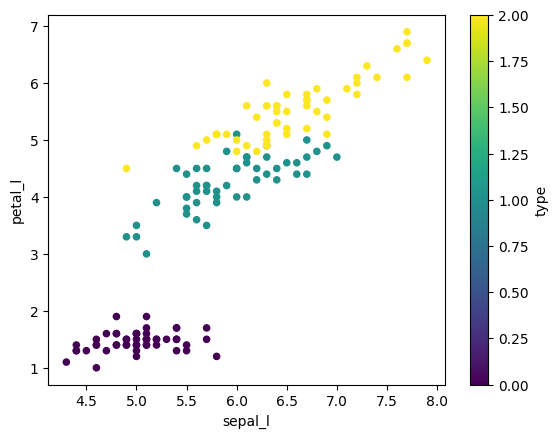

In [23]:
df.plot.scatter(x="sepal_l", y="petal_l",c="type", colormap='viridis')

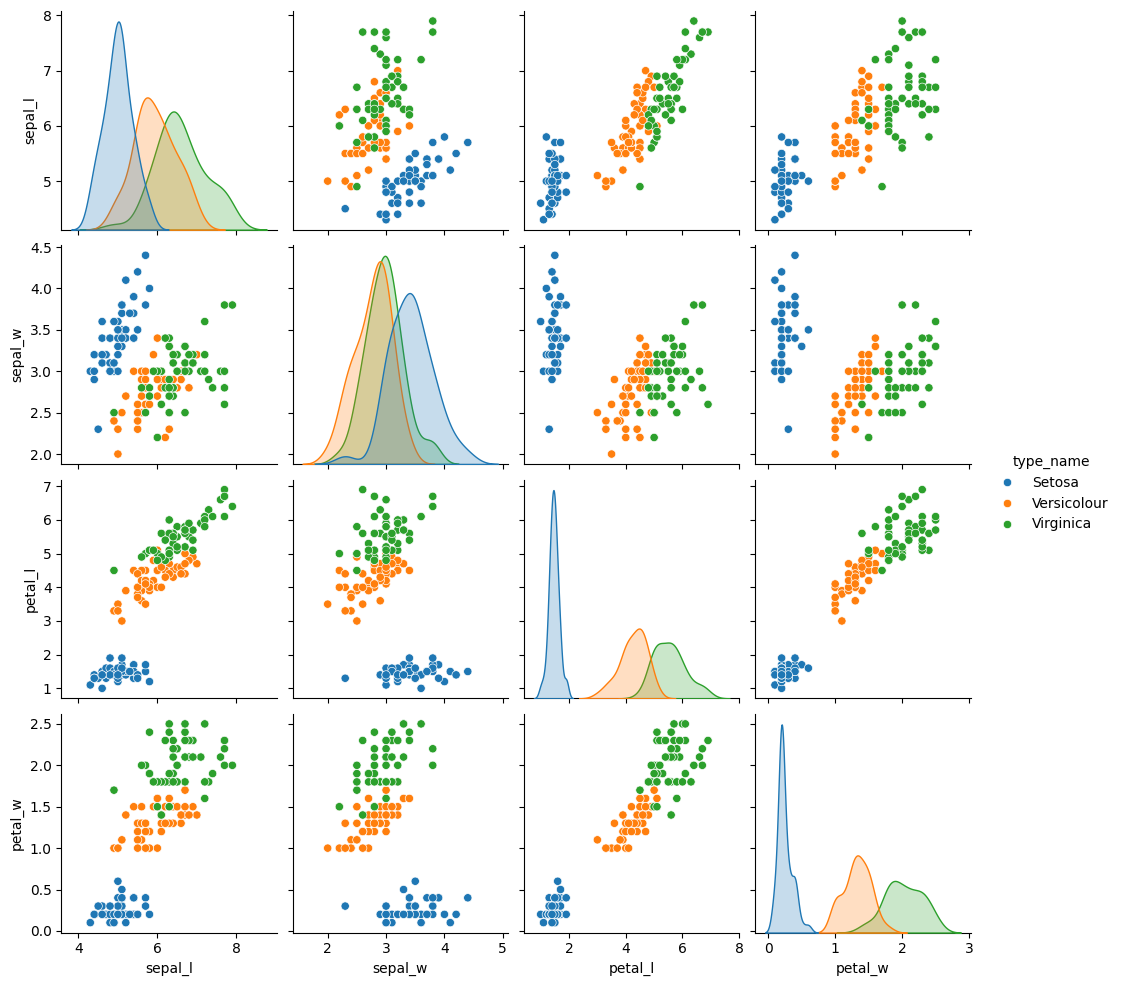

In [24]:
import seaborn as sns

df_plot = df.drop(columns=["type"])
sns.pairplot(df_plot, hue="type_name")

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X=df[["sepal_l", "sepal_w", "petal_l", "petal_w"]]
y=df["type"]
lr = LinearRegression().fit(X,y)

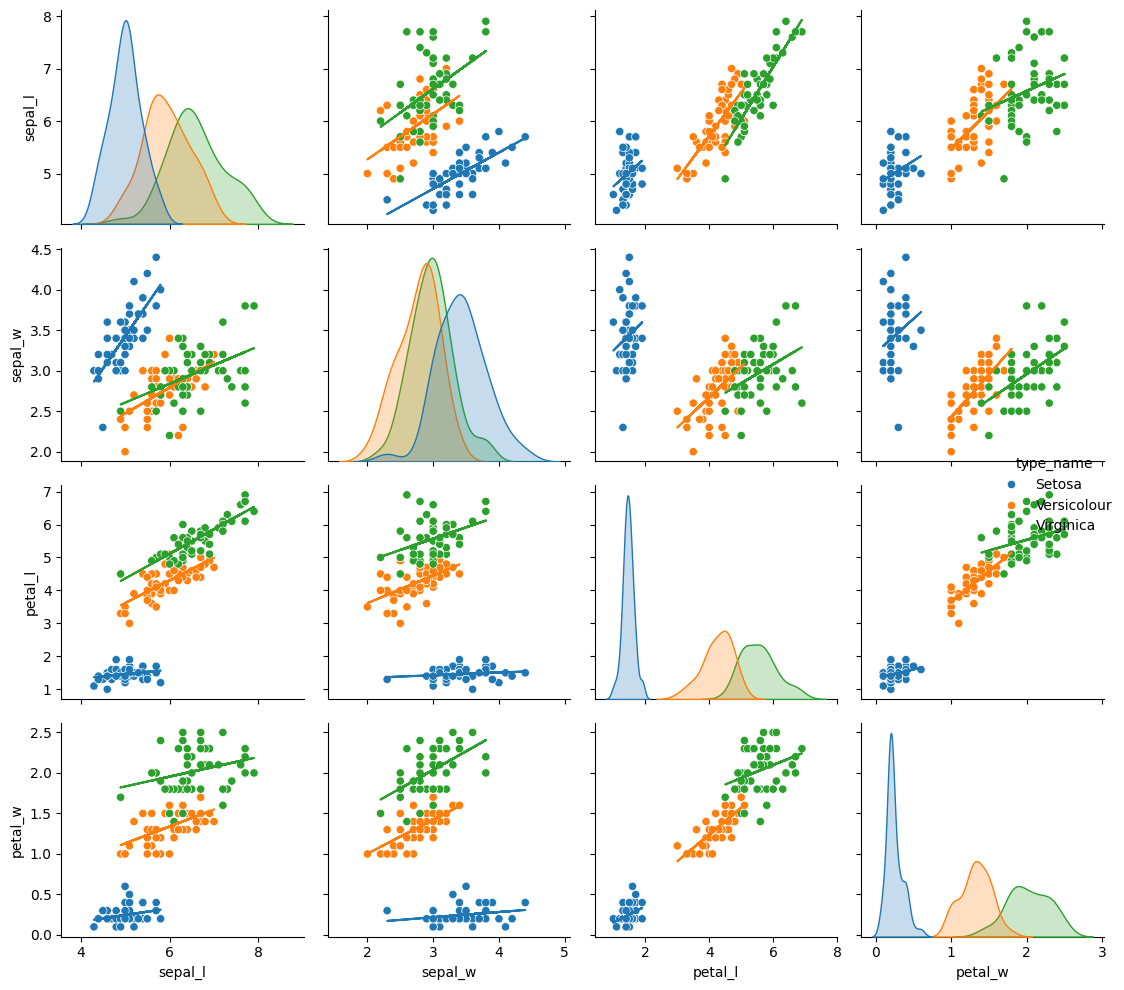

In [27]:
# Crear el pairplot
g = sns.pairplot(df_plot, hue="type_name", height=2.5)

# Función para agregar línea de tendencia
def add_trendline(x, y, color, ax):
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color=color)

# Iterar sobre los subplots del pairplot
variables = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i != j:  # Evitar la diagonal
            ax = g.axes[i, j]
            for t, color in zip(df["type_name"].unique(), sns.color_palette()):
                data = df[df["type_name"] == t]
                add_trendline(data[var2], data[var1], color, ax=ax)

plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# La regresion polinomica es solamente un caso especial de regresion lineal
# Asi que solo tenemos que transformar los datos para adaptarlos a
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_features

array([[ 5.1 ,  3.5 ,  1.4 , ...,  1.96,  0.28,  0.04],
       [ 4.9 ,  3.  ,  1.4 , ...,  1.96,  0.28,  0.04],
       [ 4.7 ,  3.2 ,  1.3 , ...,  1.69,  0.26,  0.04],
       ...,
       [ 6.5 ,  3.  ,  5.2 , ..., 27.04, 10.4 ,  4.  ],
       [ 6.2 ,  3.4 ,  5.4 , ..., 29.16, 12.42,  5.29],
       [ 5.9 ,  3.  ,  5.1 , ..., 26.01,  9.18,  3.24]])

In [29]:
lr2 = LinearRegression().fit(poly_features, y)
lr2

LinearRegression()

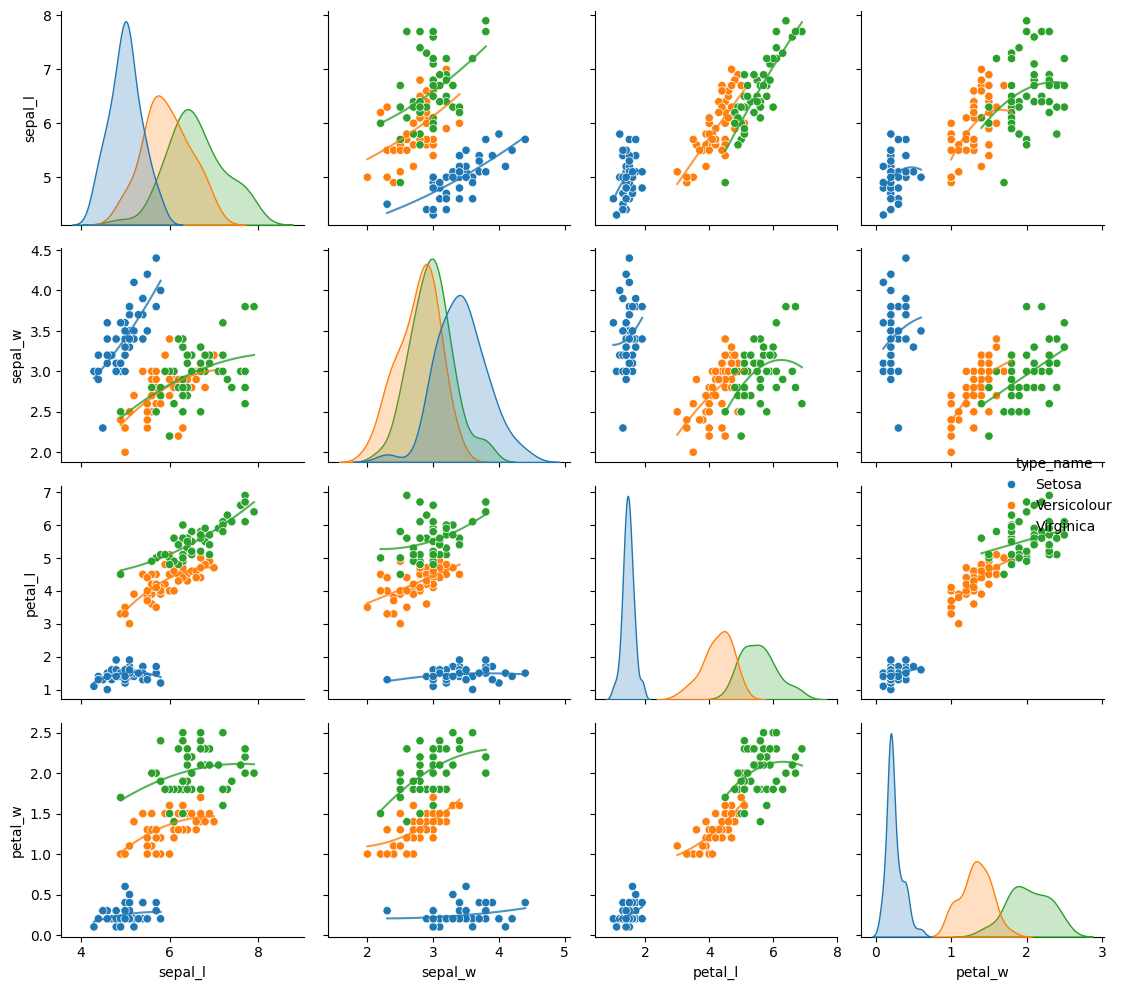

In [30]:
from sklearn.pipeline import make_pipeline

# Crear el pairplot
g = sns.pairplot(df_plot, hue="type_name", height=2.5)

# Función para agregar línea de tendencia
def add_poly_regression(x, y, color, ax, degree):
    x_array = x.values.reshape(-1, 1)
    
    # Crear y ajustar el modelo polinomial
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(x_array, y)
    
    # Generar puntos para la línea suave
    x_plot = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_plot = poly_model.predict(x_plot)
    
    # Dibujar la línea de regresión polinomial
    ax.plot(x_plot, y_plot, color=color, alpha=0.8)

# Iterar sobre los subplots del pairplot
variables = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i != j:  # Evitar la diagonal
            ax = g.axes[i, j]
            for t, color in zip(df["type"].unique(), sns.color_palette()):
                data = df[df["type"] == t]
                add_poly_regression(data[var2], data[var1], color, ax, degree=2)

plt.tight_layout()
plt.show()

<div class = "alert alert-success">
EJERCICIO: Entrena una regresion de grado 4 y grafica los resultados. Dependiendo de los datos que tengamos, ¿que debemos esperar del modelo que elijamos?
</div>

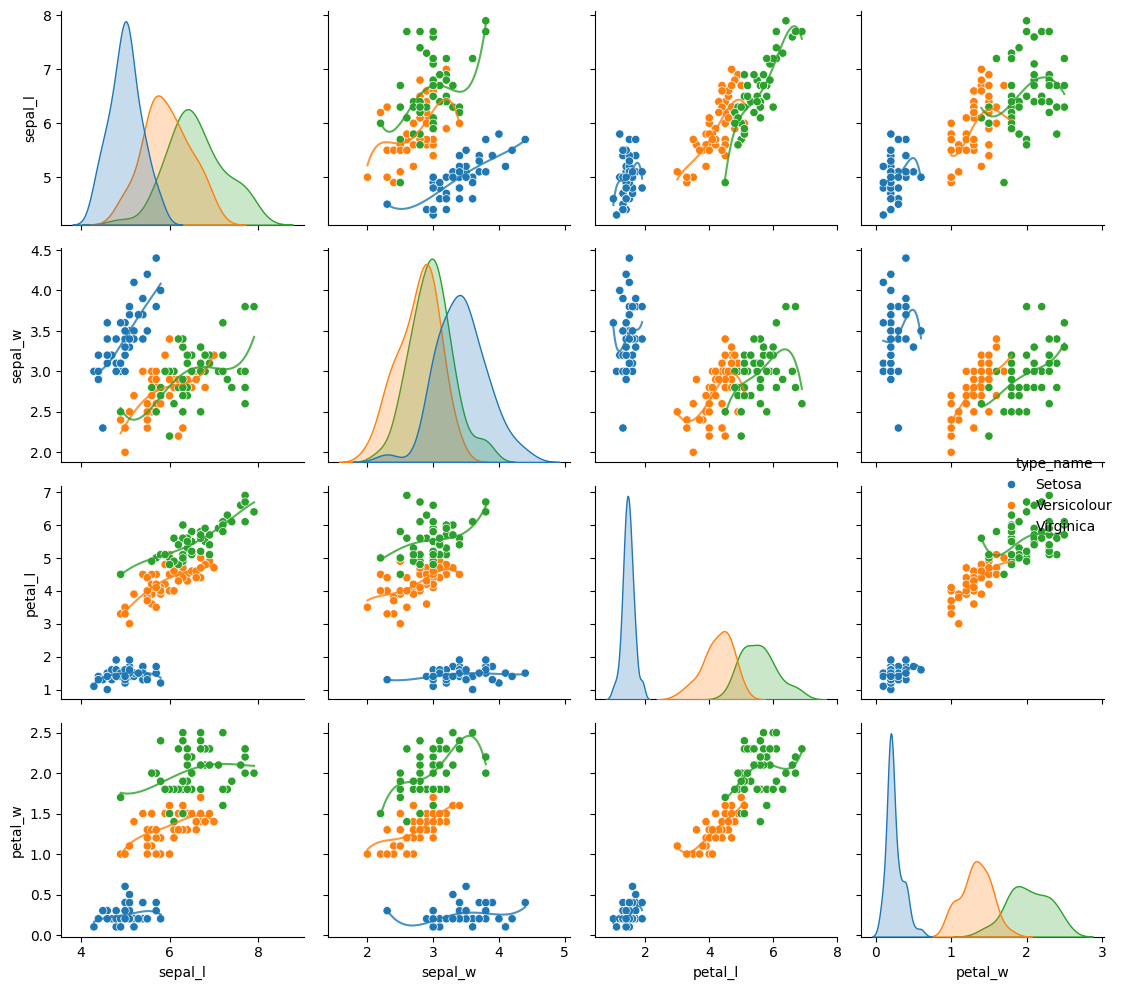

In [31]:
# ... code
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X)
lr4 = LinearRegression().fit(poly_features, y)

# Crear el pairplot
g = sns.pairplot(df_plot, hue="type_name", height=2.5)

# Iterar sobre los subplots del pairplot
variables = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i != j:  # Evitar la diagonal
            ax = g.axes[i, j]
            for t, color in zip(df["type"].unique(), sns.color_palette()):
                data = df[df["type"] == t]
                add_poly_regression(data[var2], data[var1], color, ax, degree=4)

plt.tight_layout()
plt.show()

## Calcular Error

En sklean es muy sencillo calcular el error de una regresion lineal. Solamente hay que llamar al metodo `.score()`

In [32]:
X=df[["sepal_l", "sepal_w", "petal_l", "petal_w"]]
lr.score(X,y)

0.9303939218549564

<div class = "alert alert-success">
EJERCICIO: Calcula el error para todas las regresiones polinomicas hasta grado 10, ¿Cual es la regresion con menos error? ¿Que termino parece ser el que mas afecta al error?

Por que pasa esto?
</div>

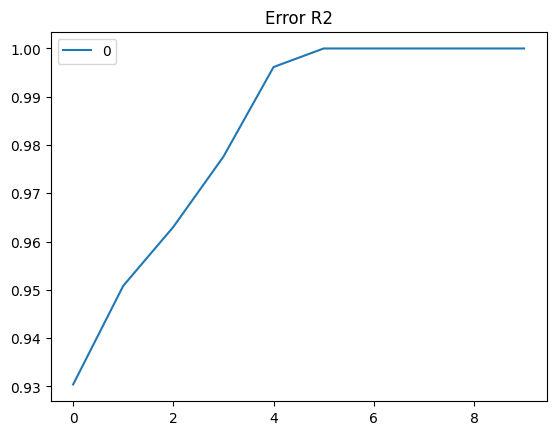

In [33]:
# ... code

errors = []
for degree in range(1,11):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X)
    lr = LinearRegression().fit(poly_features, y)
    errors.append(lr.score(poly_features,y))

_ = pd.DataFrame(errors).plot(title="Error R2")

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [36]:
X_test.shape, y_test.shape

((30, 4), (30,))

## Métricas

In [37]:
from sklearn.metrics import root_mean_squared_error

def accuracy(y_true_m, y_pred_m):
    assert len(y_true_m)==len(y_pred_m), "Error: Las longitudes no son iguales."
    correct = np.sum(y_true_m.values == y_pred_m)
    return correct/len(y_true_m)


lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

root_mean_squared_error(y_true=y_test, y_pred=y_pred)

np.float64(0.19264940801356453)

<div class = "alert alert-success">
EJERCICIO: Similar al ejercicio anterior, pero realiza el train/test split y utiliza la metrica RMSE.
Que observas esta vez?
</div>

Nota: Esta vez lo haremos bien. Utiliza `sepal_w, petal_w, petal_l` como `X` y `sepal_l` como `y`. ¿Puedes explicar en que clase de problema nos enfrentamos? ¿Si esto fuera el mundo real, y sabiendo que representa el Iris dataset, que estariamos intentando hacer?

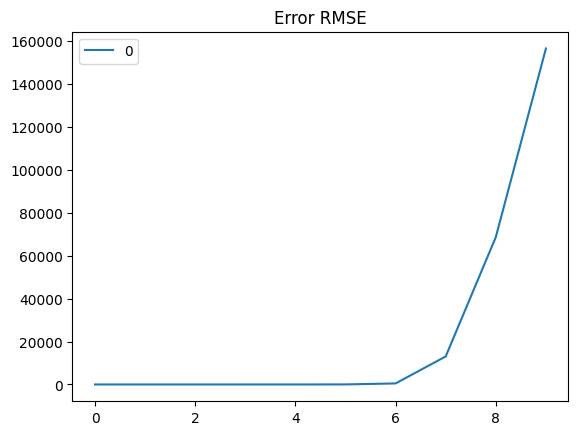

In [38]:
# ... code

X = df[["sepal_w", "petal_w", "petal_l"]]
y = df["sepal_l"]

errors = []
for degree in range(1,11):
    # ... code
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.fit_transform(X_test)
    
    lr = LinearRegression().fit(poly_features_train, y_train)
    y_pred = lr.predict(poly_features_test)
    
    errors.append(root_mean_squared_error(y_true=y_test, y_pred=y_pred))

errors
_ = pd.DataFrame(errors).plot(title="Error RMSE")

## 2. Vecinos más próximos

En este notebook vamos a trabajar con el algoritmo de KNN en distintos problemas de **clasificación**.

### 2.1. Medida de las prestaciones de un clasificador

Por clasificador entendemos un algoritmo que, a partir de un conjunto de muestras/observaciones de entrenamiento, es capaz de identificar a qué clase (categoría) pertenece una nueva observación.

Una métrica de calidad que podemos usar para medir las prestaciones de un clasificador es el **error de clasificación**

$$\textrm{Error} = \frac{\textrm{núm de muestras mal clasificadas}}{\textrm{núm de muestras total del problema}}$$

* Ejemplo: problema de clasificación con dos clases $y\in{0,1}$
    * Etiquetas reales (*y_true*) = $[1,0,0,1,0]$
    * Etiquetas predichas (*y_pred*) = $[0,0,1,1,0]$
    
    * En este caso: $$\textrm{Error} = \frac{\textrm{núm de muestras mal clasificadas} = 2}{\textrm{núm de muestras total del problema} = 5} = \frac{2}{5} = 0.4$$

Así, el error de clasificación será un número entre 0 y 1, tal que:

* $\textrm{Error} = 0$ es el mejor valor posible (no me equivoco nada)
* $\textrm{Error} = 1$ es el peor valor posible (me equivoco en todas las muestras). Nota: si me equivoco en la clasificación de todas las muestras, entonces puedo interpretar que el clasificador es bueno, pero que tengo que hacer justo lo contrario de lo que me dice. El peor valor de error sería por tanto $0.5$, en el que la incertidumbre es mayor. 

Normalmente no se utiliza el error, sino su complementario, la exactitud o [**accuracy**](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (Acc):

$$\textrm{Acc} = 1 - \textrm{Error}$$

y entonces:

* $\textrm{Acc} = 1$ es el mejor valor posible (no me equivoco nada)
* $\textrm{Acc} = 0$ es el peor valor posible (me equivoco en todas las muestras)

### 2.2 Ejemplos

Para analizar el comportamiento del algoritmo de K-NN, utilizaremos tres ejemplos sencillos, como mostraremos a continuación

In [39]:
# ejemplo1
ejemplo1 = pd.read_csv("./data/ex2data1.txt", sep=",", header=None, names=['x1', 'x2', 'label'])
ejemplo1.head()

,x1,x2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [40]:
# Qué tipo de datos es `ejemplo1`?
type(ejemplo1)

pandas.core.frame.DataFrame

#### 2.2.1 Pequeño desvío: repaso de Pandas

A no ser que alguien me haya engañado, habéis trabajado ya con Pandas. Sin embargo, lo normal es que no os acordéis de nada, así que vamos a hacer un pequeño repaso de las funciones más habituales. No toméis esto como un estudio exhaustivo, ni mucho menos; pero grosso modo os servirá para este módulo.

Vamos a ver los siguientes métodos:

- `.describe()`, que proporciona un pequeño análisis estadístico. El parámetro `include=all` permite añadir variables categóricas
- `.shape`
- `.head()`
- `.tail()`
- `.dtypes`
- Análisis de valores nulos con `.isnull()` e `.isnull().any()`
- Eliminación de columnas con `.drop(c1, axis=1)`
- Cómo acceder a los índices internos, con `.index` y `.index.values`
- Cómo acceder a un elemento determinado en base a su índice, con `.iloc[[i1, i2, i3, ...]]`
- Cómo construir un nuevo dataframe filtrando el anterior, con `df_filtered = df[condición]`
- Cómo construir un nuevo dataframe filtrando el anterior bajo condición múltiple, con `df_filtered = df[(condición 1) & (condición 2)]`


In [40]:
df = ejemplo1
df.describe(include='all')

,x1,x2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [41]:
df.shape

(100, 3)

In [42]:
df.head(7)

,x1,x2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1


In [43]:
df.tail(7)

,x1,x2,label
93,74.492692,84.845137,1
94,89.845807,45.358284,1
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [44]:
df.dtypes

x1       float64
x2       float64
label      int64
dtype: object

In [45]:
df.isnull().any()

x1       False
x2       False
label    False
dtype: bool

In [46]:
df_to_drop = df.drop('x1', axis=1)
df_to_drop.head()

,x2,label
0,78.024693,0
1,43.894998,0
2,72.902198,0
3,86.308552,1
4,75.344376,1


In [47]:
df.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [48]:
df.iloc[[2, 45, 23, 98]]

,x1,x2,label
2,35.847409,72.902198,0
45,62.222676,52.060992,0
23,34.212061,44.209529,0
98,55.340018,64.931938,1


In [49]:
df_filtered = df[(df['x1'] > 45) & (df['x2'] < 60)]
df_filtered.head()

,x1,x2,label
5,45.083277,56.316372,0
7,75.024746,46.554014,1
9,84.432820,43.533393,1
10,95.861555,38.225278,0
11,75.013658,30.603263,0


Una vez estudiado el dataframe, podemos representar:

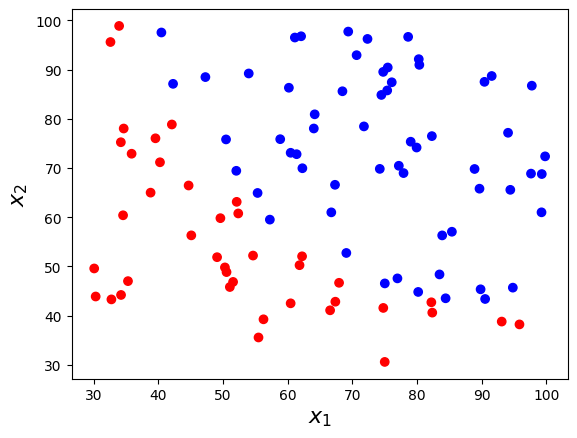

In [50]:
plt.scatter(ejemplo1['x1'], ejemplo1['x2'], c=ejemplo1['label'], cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.show()

Se dice que este problema es **linealmente separable**, porque podemos trazar una recta para separar las dos clases (representadas en distintos colores, rojo y azul).
* En el plano bidimensional: recta
* En un espacio d-dimensional: hiperplano

Nota: No es linealmente separable puesto que la separación no es perfecta. Pero es _casi_ linealmente separable, aceptamos.

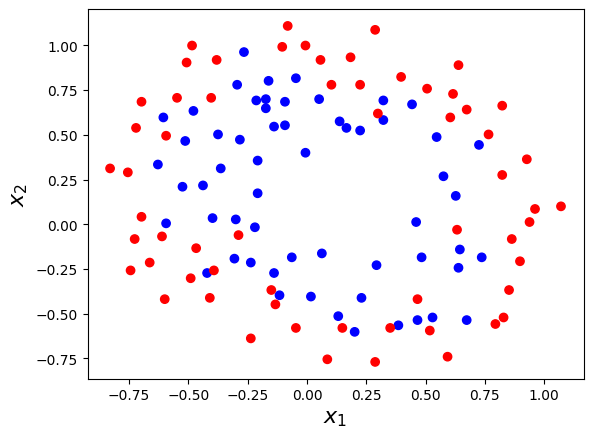

In [51]:
# ejemplo2
ejemplo2 = pd.read_csv("./data/ex2data2.txt", sep=",", header=None, names=['x1', 'x2', 'label'])

plt.scatter(ejemplo2['x1'], ejemplo2['x2'], c=ejemplo2['label'], cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.show()

Se dice que este problema es **no linealmente separable**, porque no podemos trazar una recta para separar las dos clase (representadas en distintos colores, rojo y azul).

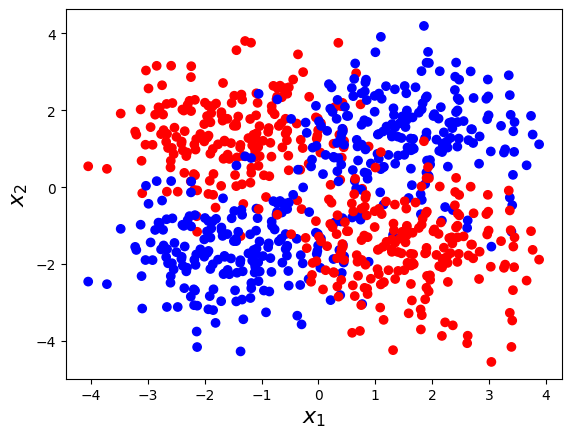

In [52]:
# ejemplo 3: Problema XOR 
np.random.seed(0)

# -- parameters
N     = 800
mu    = 1.5      # Cambia este valor
sigma = 1      # Cambia este valor

# variables auxiliares
unos = np.ones(int(N/4))
random4 = sigma*np.random.randn(int(N/4),1)
random2 = sigma*np.random.randn(int(N/2),1)

# -- features
y3 = np.concatenate([-1*unos, unos, unos, -1*unos]) 
X1 = np.concatenate([-mu + random4, mu + random4, -mu + random4, mu + random4])
X2 = np.concatenate([+mu + random2, -mu + random2])
X3 = np.hstack((X1,X2))

plt.scatter(X3[:,0], X3[:,1], c=y3, cmap=CM_BRIGHT)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.show()

Al igual que en el caso anterior, este ejemplo tampoco es linealmente separable, y se conoce como problema XOR. La ventaja del problema XOR es que conocemos cuál es la frontera de separación óptima a priori:

- Clase 1, color azul: $x_1,x_2 > 0$, y $ x_1,x_2 < 0$ (cuadrantes 1 y 3)
- Clase 2, color rojo: $x_1 < 0,  x_2 > 0$, y $x_1 > 0,  x_2 < 0$ (cuadrantes 2 y 4)

## 2.3 Entrenar el modelo 

Vamos a entrenar un modelo K-NN (<a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">documentación</a> aquí) para los distintos ejemplos:

El tipo de datos es <class 'numpy.ndarray'>


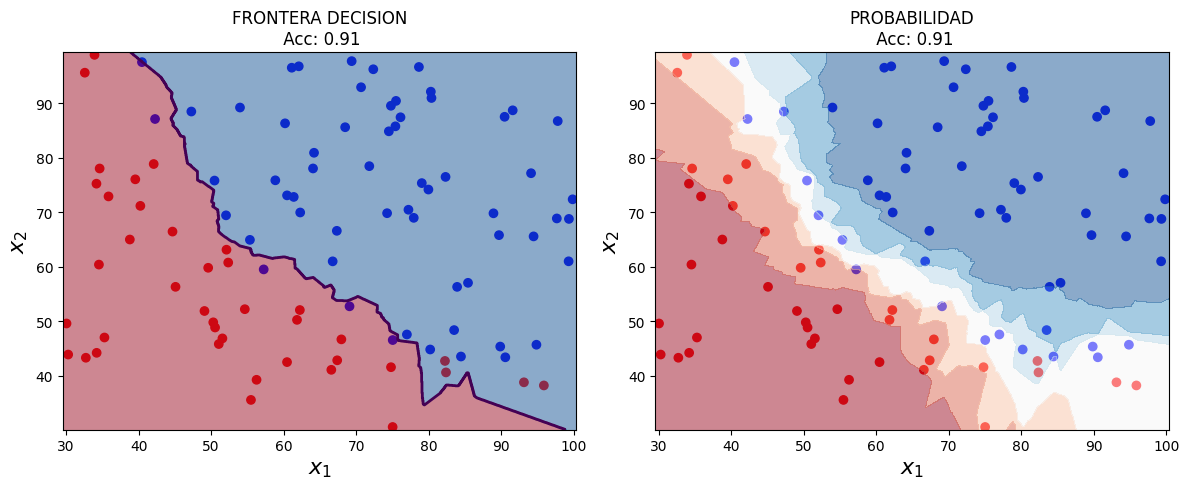

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Ejemplo 1
# preparamos los datos
data1 = ejemplo1.values
print(f'El tipo de datos es {type(data1)}')
X1 = data1[:, 0:2]
y1 = data1[:, -1]

# creamos el modelo y ajustamos
knnModel = KNeighborsClassifier(n_neighbors=10).fit(X1, y1)

plot_decision_boundary(X1, y1, knnModel)

**Número de vecinos**

Podemos modificar el número de vecinos $k$ del algoritmo k-nn implementado en scikit-learn mediante el parámetro *n_neighbors*. Por defecto, [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) toma *n_neighbors* $=5$

<div class = "alert alert-success">
EJERCICIO 1.3: Varía el valor de <b>n_neighbors</b>, ¿qué sucede ahora?
</div>

<div class = "alert alert-success">
EJERCICIO 1.4: Aplica el algoritmo K-NN sobre los ejemplos 2 y 3. ¿Qué sucedería si aplicamos sobre estos ejemplos un algoritmo de <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">regresión logística</a>? ¿Qué pasa si variamos el número de vecinos?
</div>

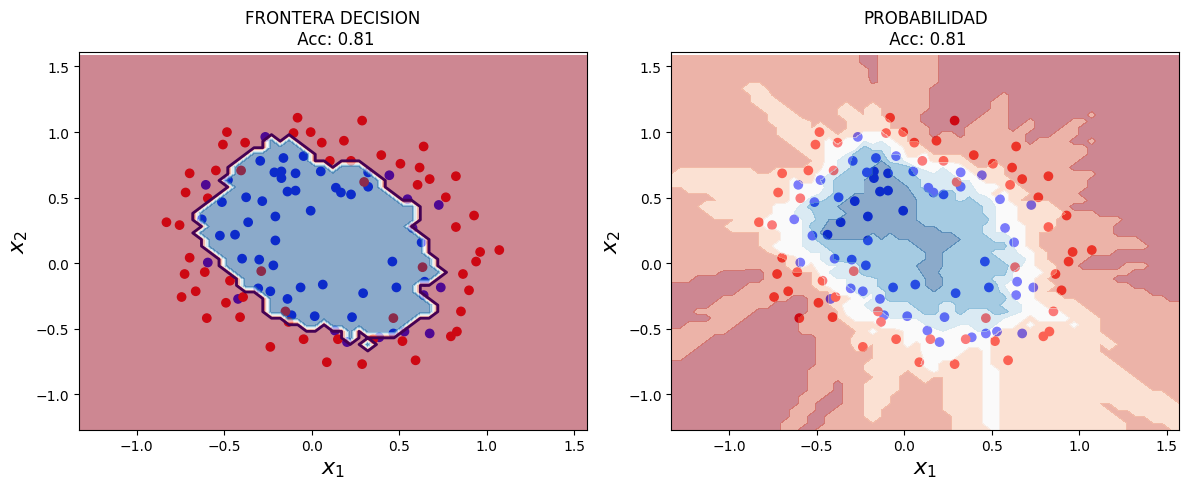

In [54]:
# Ejemplo 2
from sklearn.neighbors import KNeighborsClassifier

data2 = ejemplo2.values
X2 = data2[:, 0:2]
y2 = data2[:, -1]

# creamos el modelo y ajustamos
knnModel2 = KNeighborsClassifier(n_neighbors=10).fit(X2, y2)

plot_decision_boundary(X2, y2, knnModel2)

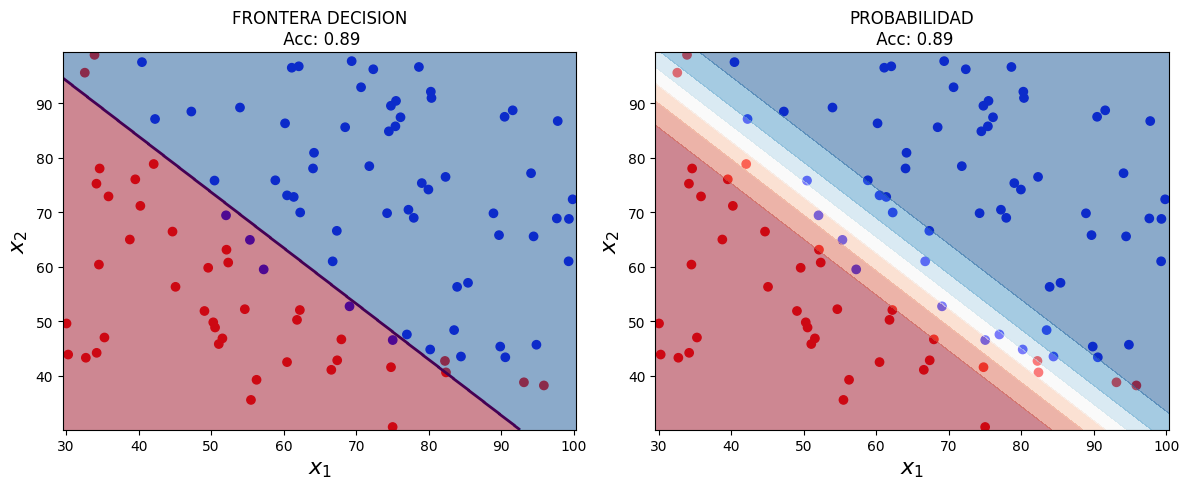

In [55]:
from sklearn.linear_model import LogisticRegression

# .... código para crear el modelo y entrenar
lrModel = LogisticRegression().fit(X1, y1)
plot_decision_boundary(X1, y1, lrModel)

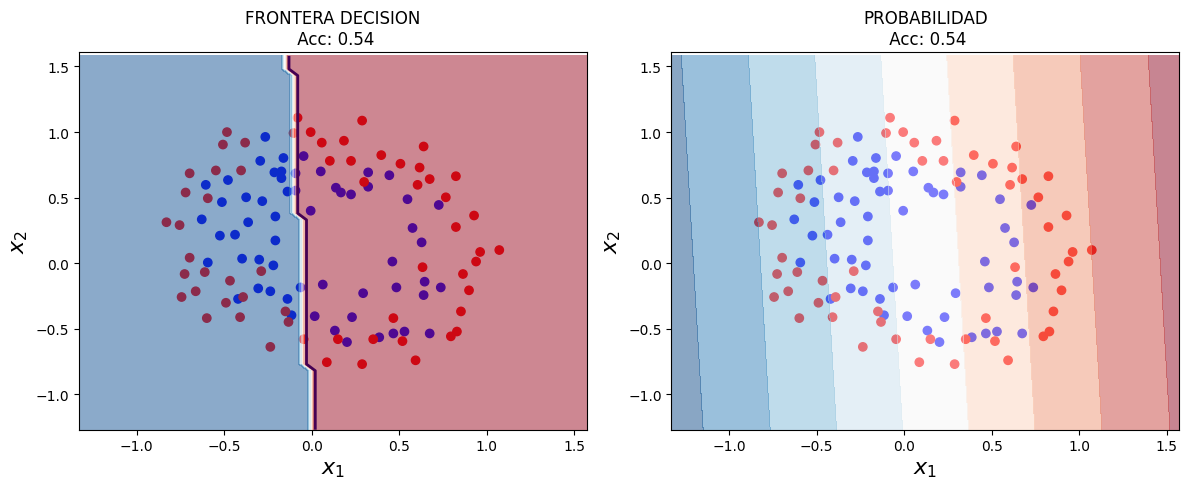

In [56]:
from sklearn.linear_model import LogisticRegression

# .... código para crear el modelo y entrenar
lrModel = LogisticRegression().fit(X2, y2)
plot_decision_boundary(X2, y2, lrModel)

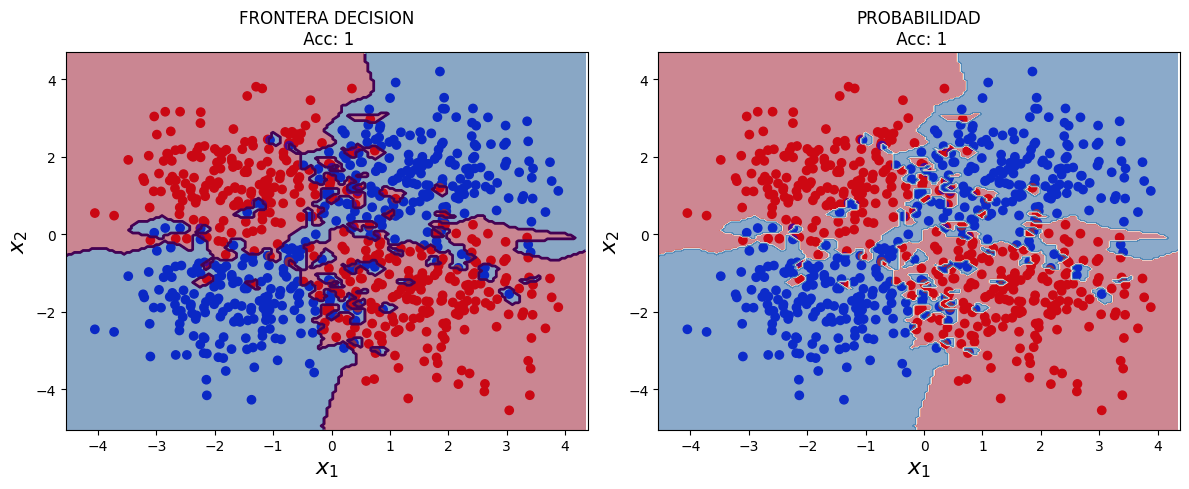

In [57]:
# Ejemplo 3
from sklearn.neighbors import KNeighborsClassifier

# ... código para crear el modelo y entrenar
knnModel3 = KNeighborsClassifier(n_neighbors=1).fit(X3, y3)

plot_decision_boundary(X3, y3, knnModel3)

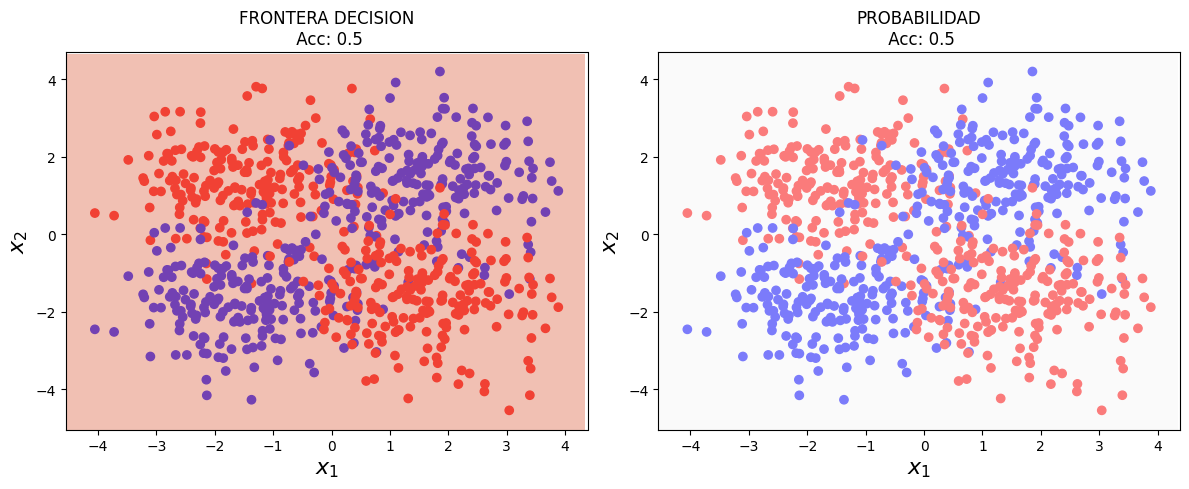

In [58]:
from sklearn.linear_model import LogisticRegression

# .... código para crear el modelo y entrenar
lrModel3 = LogisticRegression().fit(X3, y3)
plot_decision_boundary(X3, y3, lrModel3)

Podemos comprobar que las mejores prestaciones se obtienen cuando *n_neighbors=1*, ¿tiene sentido? ¿Estamos midiendo correctamente las prestaciones de este clasificador?

# 3. Evaluación del modelo: entrenamiento y test

La respuesta es claramente no. Para poder saber cómo de bien se comporta un algoritmo de machine learning, hemos de medir su capacidad de [generalización](https://en.wikipedia.org/wiki/Generalization_error), esto es, las prestaciones en muestras no vistas previamente por el clasificador. Para ello, dividimos el conjunto de datos en dos partes, entrenamiento y test, teniendo en cuenta que:

![](./figuras/train_test_set_2d_classification.png)

* Utilizamos aproximadamente un 75-80% de las muestras para entrenamiento y un 25-20% para el test (cuidado! depende del tamaño del dataset; si es muy grande, el conjunto de test puede ser un porcentaje menor)
* Ambos conjuntos han de representar la población con la misma estadística: 
    * Randomizar, esto es, reordenar para evitar orden en las muestras. (cuidado series temporales)
    * Estratificar con respecto a una variable (normalmente la variable target), para mantener la proporción de la varible target en los conjuntos train/test.

sklern nos proporciona una [función](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para dividir nuestros datos. 

Vamos a probar con el primer ejemplo:

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


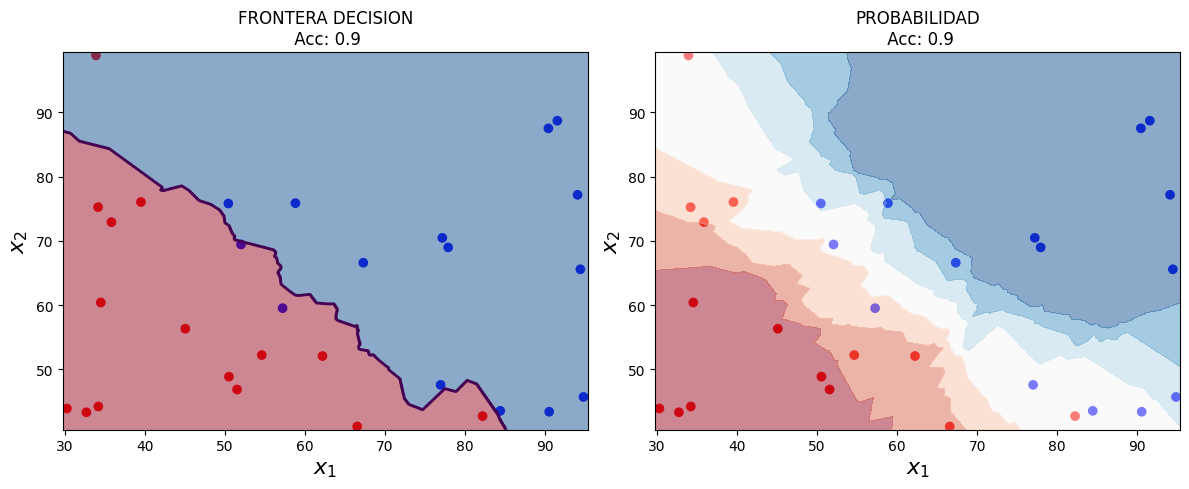

In [59]:
from sklearn.model_selection import train_test_split

print(type(X1))

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, shuffle=True)#, random_state=0)

print(type(X_train))

knn = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)

plot_decision_boundary(X_test, y_test, knn)

<div class = "alert alert-success">
EJERCICIO 1.5: Sobre la celda anterior, varía el valor de <b>n_neighbors</b>. ¿Para qué valor se obtienen ahora las mejores prestaciones? ¿Qué sucede si eliminamos <b>random_state = 0</b> y ejecutamos varias veces la misma celda para un valor de <b>n_neighbors</b> fijo? ¿Obtenemos las mismas prestaciones?
</div>

<div class = "alert alert-success">
EJERCICIO 1.6: Calcula las prestaciones del algoritmo K-NN para los ejemplos 2 y 3. 
</div>

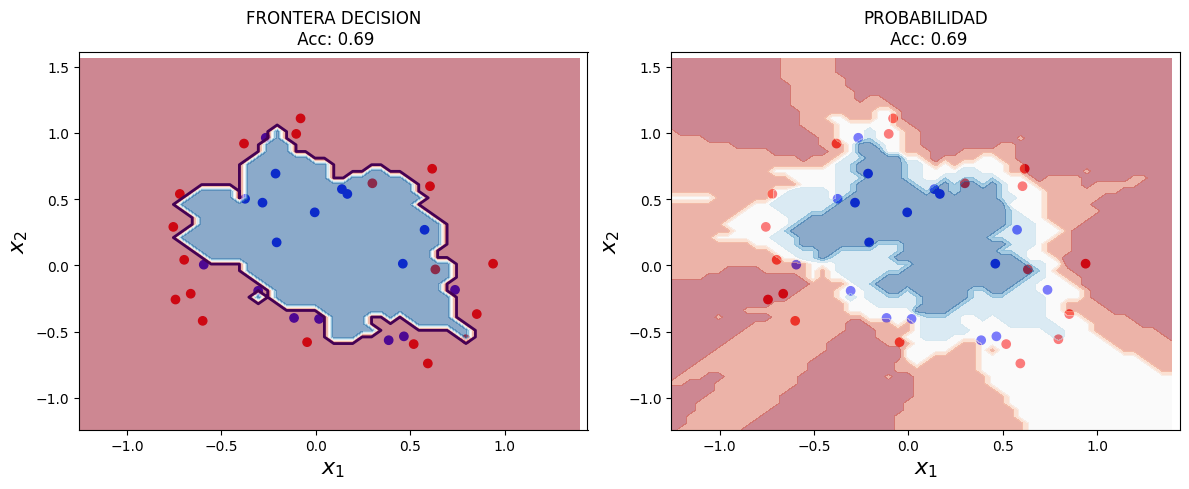

In [60]:
# Ejemplo 2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)

plot_decision_boundary(X_test, y_test, knn)

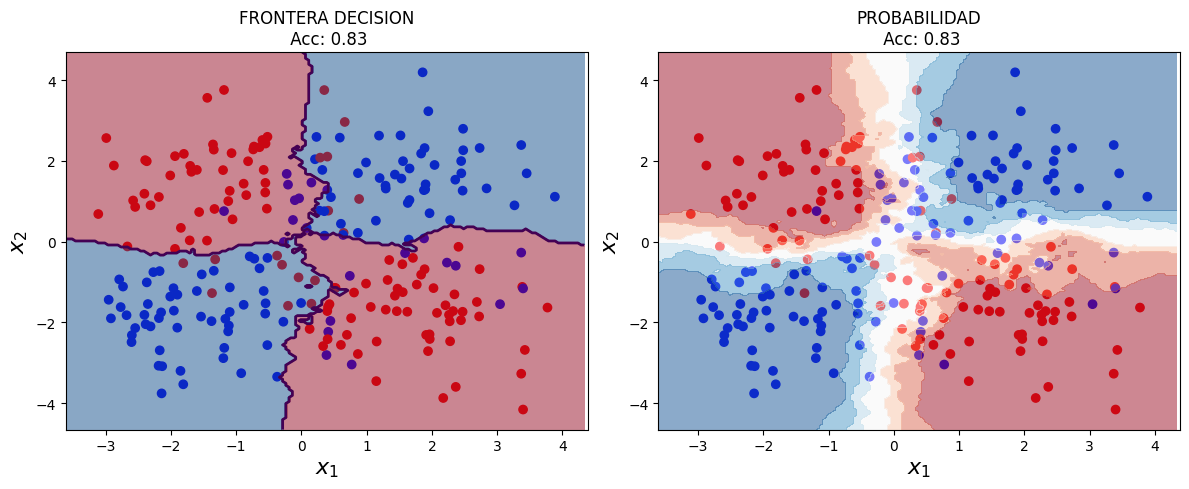

In [61]:
# Ejemplo 3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, shuffle=True, random_state=0)

knn = KNeighborsClassifier(n_neighbors=15).fit(X_train, y_train)

plot_decision_boundary(X_test, y_test, knn)

<div class = "alert alert-success">
EJERCICIO 1.7: Vamos a realizar un análisis del parámetro de estratificación, para ver el efecto que tiene en los datos 
</div>

In [62]:
# Una forma de estudiarlo
ejemplo1['label'].value_counts()

label
1    60
0    40
Name: count, dtype: int64

In [63]:
# Otra forma de estudiarlo
np.unique(y_train, return_counts=True)

(array([-1.,  1.]), array([284, 276]))

In [64]:
y_train.shape

(560,)

In [65]:
# Ahora: cómo haríais el análisis completo?

# Porcentaje global
print('DISTRIBUCIÓN DEL DATASET ENTERO')
y = ejemplo1['label'].values
print(f'% ceros en total: {((np.unique(y, return_counts=True)[1][0]/y.shape[0])*100):.2f}')
print('\n')

# Sin estratificar
print('SIN ESTRATIFICAR')
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, shuffle = True)
print(f'% ceros en train: {((np.unique(y_train, return_counts=True)[1][0]/y_train.shape[0])*100):.2f}')
print(f'% ceros en test: {((np.unique(y_test, return_counts=True)[1][0]/y_test.shape[0])*100):.2f}')
print('\n')
      
# Estratificando
print('ESTRATIFICANDO')
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, shuffle = True, stratify=y1)
print(f'% ceros en train: {((np.unique(y_train, return_counts=True)[1][0]/y_train.shape[0])*100):.2f}')
print(f'% ceros en test: {((np.unique(y_test, return_counts=True)[1][0]/y_test.shape[0])*100):.2f}')
print('\n')

DISTRIBUCIÓN DEL DATASET ENTERO
% ceros en total: 40.00


SIN ESTRATIFICAR
% ceros en train: 42.86
% ceros en test: 33.33


ESTRATIFICANDO
% ceros en train: 40.00
% ceros en test: 40.00




<div class = "alert alert-success">
EJERCICIO 1.8 (AVANZADO): Representa las prestaciones del algoritmo K-NN en entrenamiento y test para distintos valores de <b>n_neighbors</b> (entre 1 y 15), utilizando el ejemplo 3. 
</div>

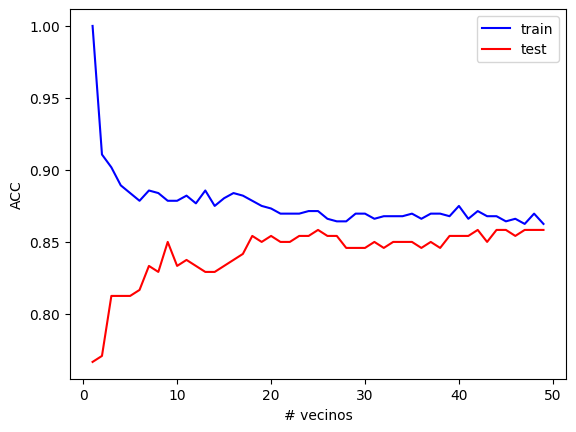

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, shuffle = True, random_state = 0)

# inicializamos
neighbors = range(1,50)
acc_train = []
acc_test  = []

for n in neighbors:
    
    # ... código aquí
    # pista: lo único que hay que hacer es instanciar el modelo,
    # definiendo correctamente el parámetro del número de vecinos,
    # y luego hacer `.fit()` sobre los datos de train
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    acc_train.append(knn.score(X_train, y_train))
    acc_test.append(knn.score(X_test, y_test))
    

plt.plot(neighbors,acc_train,'b',label='train')
plt.plot(neighbors,acc_test,'r',label='test')
plt.legend()
plt.xlabel('# vecinos')
plt.ylabel('ACC')
plt.show()


El número de vecinos que escojamos afecta significativamente a las prestaciones del algoritmo. Este parámetro es un compromiso entre los errores que cometemos (*accuracy*) y la complejidad del modelo (frontera de separación). 

- Cuanto menor es el número de vecinos, **más compleja** es la frontera de separación, y por tanto mayor será el sobreajuste. Potencialmente empeorará la *accuracy*.
- Cuanto mayor es el número de vecinos, **menos compleja** es la frontera de separación y por tanto menor será el sobreajuste. Potencialmente mejorará la *accuracy*.

## 3.1 Conclusiones

1. Si las muestras de entrenamiento son escasas (ejemplo 1), el error en test puede ser muy variable , dependiendo de las muestras incluidas en el conjunto de entrenamiento y el conjunto de test.

2. Las prestaciones (en test), dependen del número de vecinos que determinan la complejidad de la frontera de separación.

Teniendo en cuenta 1 y 2, ¿cómo puedo escoger el valor óptimo de *n_neighbors*?


# 4. Selección del modelo: validación cruzada

La validación cruzada (o cross-validation) consiste en subdivir el conjunto de entrenamiento en $K$ partes iguales, de tal forma que se utilizan $K-1$ para entrenar (ajustar el modelo) y el bloque $k$ restante para evaluar las prestaciones en función de los parámetros libres. Este proceso se repite $K$ veces (hasta que se barren todos los bloques) y los resultados se promedian.

Por suerte, no es necesario programar estas subdivisiones, porque scikit-learn tiene un clase que realiza este trabajo por nosotros. Puedes consultarlo [aquí](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

Vamos a buscar el valor óptimo del número de vecinos utilizando una estrategia 5-fold CV.

In [67]:
from sklearn.model_selection import StratifiedKFold

# recordemos que este es nuestro conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, shuffle = True, random_state = 0, stratify=y3)

nFolds = 5 #scikit-learn los llama splits
kf  = StratifiedKFold(n_splits = nFolds, shuffle = True, random_state=0)

nVecinos = range(1,16) # [1-15]

# inicializamos una matriz de errores, para cada valor de n_neighbors y cada iteración del algoritmo de cross-validation
# - tantas filas como número de folds
# - tantas columnas como valores de vector del numero de vecinos
accMatriz = np.zeros((nFolds,len(nVecinos))) d

j = 0 # inicializamos contador de columnas
for n in nVecinos:
       
    knn = KNeighborsClassifier(n_neighbors = n)
    
    i = 0 # inicializamos contador de filas
    for idxTrain, idxVal in kf.split(X_train,y_train):
      
        Xt = X_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = X_train[idxVal,:]
        yv = y_train[idxVal]
        
        knn.fit(Xt,yt)
        accMatriz[i,j] = knn.score(Xv, yv) 
        
        i+=1
    j+=1

accVector = np.mean(accMatriz,axis=0)
accStd = np.std(accMatriz,axis=0)

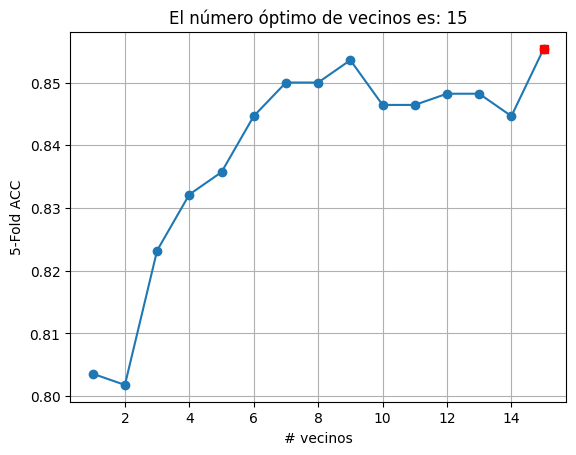

In [68]:
# Calculamos el valor óptimo
idx = np.argmax(accVector)
nOpt = nVecinos[idx]

plt.plot(nVecinos,accVector,'-o')
plt.plot(nVecinos[idx],accVector[idx],'rs')
plt.title('El número óptimo de vecinos es: %d' % nOpt)
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

Representemos ahora la gráfica anterior con la variación (desviación estándar) de la *accuracy* en cada *fold*. 

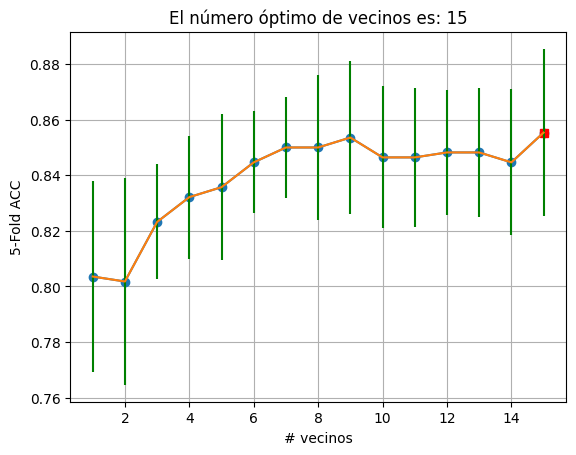

In [69]:
plt.plot(nVecinos,accVector,'-o')
plt.plot(nVecinos[idx],accVector[idx],'rs')
plt.errorbar(nVecinos, accVector, yerr=accStd, ecolor='g')
plt.title('El número óptimo de vecinos es: %d' % nOpt)
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

In [70]:
# Damos las prestaciones reales del modelo (en test)
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)

print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.88


El código anterior se puede reducir drásticamente si utilizamos [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Pido perdón por el susto.

El código de la siguiente celda es equivalente al de las cuatro celdas anteriores:

Fitting 5 folds for each of 15 candidates, totalling 75 fits
best mean cross-validation score: 0.864
best parameters: {'n_neighbors': np.int64(11)}


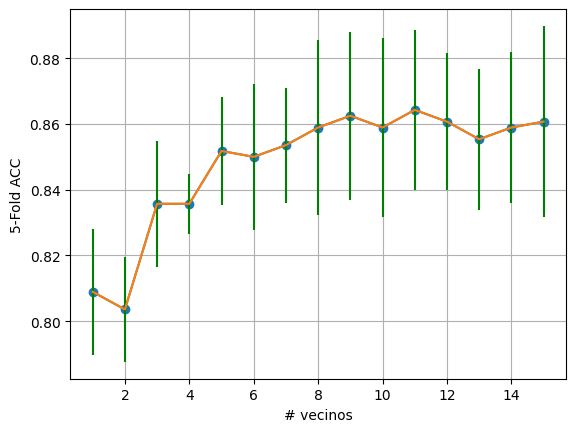

acc (test): 0.84


In [71]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, shuffle = True, random_state = 0)

param_grid = {'n_neighbors':  np.arange(1, 16, 1)}
grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5, verbose=1).fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(np.arange(1, 16, 1),scores,'-o')
plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format(grid.score(X_test, y_test)))

# Referencias

1. Capítulo 2. An Introduction to Statistical Learning. 
2. [Bias–variance tradeoff](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)
3. [Underfitting and overfitting, scikit learn docs](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)

# Ejercicio final del tema

Aplica lo que has aprendido en un dataset de cyberseguridad. Vamos a utilizar para ello un dataset de deteccion de spam en correo electronico. En el dataset, cada fila corresponde con el analisis textual de un email en la bandeja de entrada de un empleado.

 - Analiza que tiene el dataset. Cuantas filas? Cuantas columnas? Cual es la variable objetivo? Que significa cada columna?
 - Que tipo de problema es? Clasificacion o regresion? Por que?
 - En base al tipo de problema detectado, elige un modelo de ML para entrenarlo sobre los datos.
 - Elige una metrica que tenga sentido para este problema.
 - Haz un split de los datos para el entrenamiento.
 - Entrena el modelo.
 - Evalua que tal ha ido el entrenamiento con la metrica que has utilizado.
 - Explica que significa el valor de la metrica obtenida a un niño de 5 años.
 - Usa el modelo entrenado para predecir sobre datos que no ha visto nunca (df_realWorld), tienen sentido las predicciones? Como puedes estar seguro?

In [163]:
df = pd.read_csv('data/spam.csv')
df_realWorld = pd.read_csv('data/spam_realWorld.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.0,3.537,40,191,1
1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.0,3.537,40,191,1
2,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.0,3.000,15,54,1
3,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.0,2.450,11,49,1
4,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.0,1.729,43,749,1
